# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *P*

**Names:**

* *Matthias Leroy*
* *Alexandre Poussard*
* *Pierre Fouche*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import collections

graph1 = nx.read_edgelist('../data/network1.csv', delimiter = ",")
nbr_edges = nx.number_of_edges(graph1)
nbr_nodes = nx.number_of_nodes(graph1)
print(nbr_edges)
print(nbr_nodes)

18584
13033


#### Exercise 2.2:  Node degree distribution

Counter({1: 8192, 2: 2889, 3: 736, 4: 331, 5: 202, 6: 132, 7: 86, 8: 53, 9: 49, 10: 43, 11: 36, 15: 27, 12: 18, 17: 16, 14: 15, 13: 13, 20: 13, 19: 10, 24: 10, 21: 9, 16: 8, 22: 8, 18: 7, 28: 7, 23: 6, 34: 6, 25: 5, 26: 5, 29: 5, 30: 5, 32: 4, 64: 4, 27: 3, 33: 3, 40: 3, 53: 3, 75: 3, 129: 3, 35: 2, 36: 2, 38: 2, 45: 2, 46: 2, 48: 2, 52: 2, 56: 2, 113: 2, 31: 1, 39: 1, 41: 1, 42: 1, 44: 1, 47: 1, 49: 1, 50: 1, 51: 1, 54: 1, 55: 1, 57: 1, 58: 1, 59: 1, 60: 1, 62: 1, 69: 1, 70: 1, 73: 1, 77: 1, 79: 1, 81: 1, 86: 1, 91: 1, 95: 1, 1083: 1, 300: 1, 106: 1, 619: 1, 379: 1, 126: 1, 128: 1, 141: 1, 148: 1, 155: 1, 159: 1, 168: 1, 691: 1, 194: 1, 455: 1, 1482: 1, 207: 1, 467: 1, 216: 1, 292: 1, 225: 1, 248: 1})


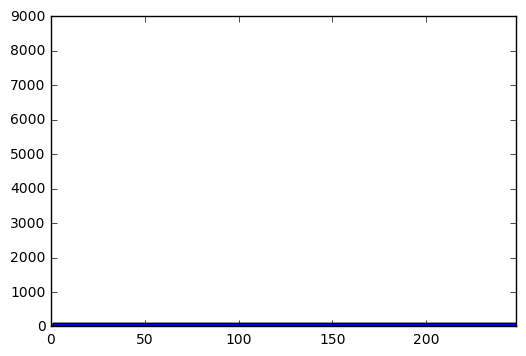

In [10]:
degree = graph1.degree(graph1.nodes())
degreeCount = collections.Counter(sorted(list(degree.values())))
print(degreeCount)
plt.plot(list(degreeCount.keys()),list(degreeCount.values()))
plt.axis([0,248,0,9000])
plt.show()         


#### Exercise 2.3: Giant component

In [ ]:
print(nx.number_connected_components(graph1))
giant = max(nx.connected_component_subgraphs(graph1), key=len)
print(len(giant))

#### Exercise 2.4: Short paths & Small-worlds

In [6]:
dicPath = nx.shortest_path_length(graph1)
path = []
for value in dicPath.values():
    for value2 in value.values():
        path.append(value2)
print(len(path))

158157161


#### Exercise 2.5: Network comparison

Counter({4: 65474728, 5: 36566228, 3: 34525164, 6: 12475344, 2: 5419352, 7: 2979234, 8: 575000, 9: 81668, 1: 37168, 0: 13033, 10: 9442, 11: 772, 12: 28})


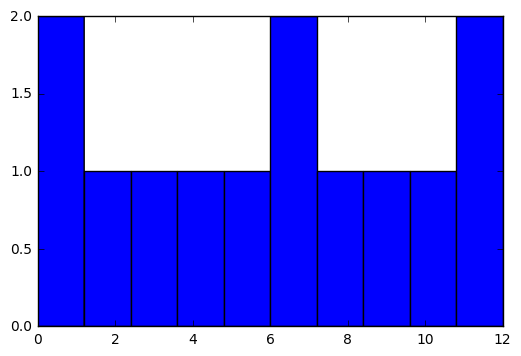

In [14]:
distribPath = collections.Counter(path)
print(distribPath)
plt.hist(list(distribPath.keys()))
plt.show()

#### Exercise 2.6: Network identification

In [ ]:
graph2 = nx.read_edgelist('../data/network2.csv', delimiter = ",")
nbr_edges2 = nx.number_of_edges(graph2)
nbr_nodes2 = nx.number_of_nodes(graph2)
print(nbr_edges)
print(nbr_nodes)
degree2 = graph1.degree(graph2.nodes())
degreeCount2 = collections.Counter(sorted(list(degree2.values())))
print(degreeCount2)
plt.loglog(list(degreeCount2.values()))
plt.show()
print(nx.number_connected_components(graph2))
giant2 = max(nx.connected_component_subgraphs(graph2), key=len)
print(len(giant2))
